# Preprocesamiento y visualización de datos con el dataset "Fashion MNIST"

En este notebook repasaremos las tareas para preprocesar el conjunto de datos Fashion MNIST y visualizarlo. Al igual que en los notebooks anteriores, pasaremos por un proceso paso a paso para la preparación del conjunto de datos para el modelado.


## Contexto

¿Por qué necesitamos preprocesamiento de datos en primer lugar? Bueno, la respuesta es simple: Necesitamos asegurarnos de que los datos estén presentes con las cualidades que necesitamos de ellos para modelar. ¿Qué hemos visto hasta ahora?

1. La visualización nos ayuda a comprender mejor los datos.
2. Eliminar los datos erróneos nos permite pasar los datos para entrenamiento sin ningún problema.

## Los archivos que necesita se encuentran en la carpeta FMNIST, dentro de la carpeta de laboratorios del bloque 1. Puede moverlos a esta carpeta para facilitar el ejercicio si lo desea.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

raw_data_train = pd.read_csv("FMNIST/fashion-mnist_train.csv")
raw_data_test = pd.read_csv('FMNIST/fashion-mnist_test.csv')

## 1. Visualización

### Tarea 1
Intentemos una tarea de ejemplo. Dado nuestro conjunto de datos, intente usar matplotlib para imprimir una imagen en escala de grises.

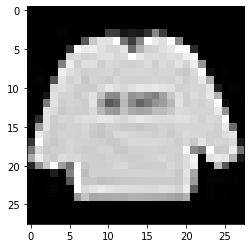

In [3]:
#Respuesta
image_resized = np.resize(raw_data_train.iloc[0,1:].values,(28,28))
plt.imshow(image_resized, cmap='gray', interpolation='none')
plt.show()

### Tarea 2
Ahora intente imprimir las 12 primeras imágenes con las etiquetas de las imágenes en forma de cuadrícula.

In [5]:
etiquetas = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,9))
for i in range(0,12):
    plt.subplot(3,4,i+1)
    #Respuesta
    image_resized = #suCódigoAquí
    plt.title(etiquetas[raw_data_train.iloc[i,0]])
    plt.imshow(#suCódigoAquí)
    
    plt.axis('off')
plt.show()

SyntaxError: invalid syntax (<ipython-input-5-cd4798c9e1c9>, line 8)

## 2. Preprocesamiento de datos

Nuestro objetivo es crear 6 variables de datos.
1. Conjunto de entrenamiento (Training set) (X, Y)
2. Conjunto de validación (Validation set) (X, Y)
3. Conjunto de prueba (Testing set) (X, Y)

¿Por qué dividimos los datos en conjuntos de entrenamiento y validación?

Recuerde, en el problema de aprendizaje supervisado, alimentamos nuestro conjunto de entrenamiento (que comprende nuestras características seleccionadas y el objetivo) a nuestra función de aprendizaje. Luego, creará un modelo basado en el conjunto de entrenamiento.

El conjunto de validación se usa posteriormente para probar la predicción del modelo y ver cómo funciona el modelo.

Para obtener más información, visite https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6.

Lea la sección sobre '¿Qué es sobreajustar / desajustar un modelo?' para obtener más información sobre por qué dividimos los conjuntos de prueba y entrenamiento y sus efectos si sobreajustamos o desajustamos un modelo.

Implementemos el código llamando a la función train_test_split. Vamos a dividir el conjunto de trenes en el 80% de los datos y el conjunto de validación en el 20% de los datos.

In [6]:
X = np.array(raw_data_train.iloc[:, 1:])
y = pd.get_dummies(np.array(raw_data_train.iloc[:, 0]))

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=12)

Ahora que hemos extraído los datos de entrenamiento, prueba y validación, necesitamos realizar ciertos cambios en ellos. Pero antes de continuar con ellos, necesitamos definir las siguientes variables.

1. im_rows <- filas de imágenes
2. im_cols <- columnas de imagen
3. input_shape <- una tupla que contiene la forma de entrada para el proceso de entrenamiento.

In [7]:
# Respuesta
im_rows, im_cols = #suCódigoAquí
input_shape = (im_rows, im_cols, 1)

La variable input_shape puede ser un poco complicada de entender. ¿Por qué tiene la forma que tiene?

La variable input_shape tiene la forma que tiene para resaltar las 3 dimensiones que puede tener una imagen.
Dado que nuestras imágenes son en escala de grises, las imágenes tendrán dimensiones de
(ancho de imagen, largo de imagen, 1)

Para esta próxima sección, crearemos dummies para la variable 'y_test' y crear una matriz numpy para la variable 'x_test'.

In [7]:
# Test data
X_test = np.array(raw_data_test.iloc[:, 1:])
y_test = pd.get_dummies(np.array(raw_data_test.iloc[:, 0]))

### Tarea
Utilice la función de remodelación de numpy para remodelar nuestros datos para que tengan 4 dimensiones.
1. Número de imágenes
2. Altura de la imagen
3. Ancho de la imagen
4. Número de canales (1)

In [10]:
# RESPONDER
# entrenar y validar conjuntos
X_train = X_train.reshape(X_train.shape[0], im_rows, im_cols, 1)
X_validate = X_validate.reshape(#suCódigoAquí)
X_test = X_test.reshape(#suCódigoAquí)


### Normalización

El siguiente tema que cubriremos es la normalización. Es algo que se usa para deshacerse de la distorsión en las imágenes y brindar un mejor resultado en el proceso de aprendizaje automático. Al buscar la normalización en la web, es fácil confundirse con la gran cantidad de términos e ideas que la rodean.

Consulte este enlace para obtener más detalles https://datascience.stackexchange.com/questions/29958/when-inputting-image-rgb-values-to-mlp-should-i-divide-by-255.

### Tarea

Realice la normalización de las variables de datos (X_train, X_validate, X_test) dividiendo cada valor por 255. ¿Qué le deja esto?

In [12]:
# normalización
X_train = #suCódigoAquí
X_validate = #suCódigoAquí
X_test = #suCódigoAquí

In [13]:
print("X_train shape:", X_train.shape)
print("X_validate shape:", X_validate.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_validate shape:", y_validate.shape)
print("y_test shape:", y_test.shape)

X_train shape: (48000, 28, 28, 1)
X_validate shape: (12000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (48000, 10)
y_validate shape: (12000, 10)
y_test shape: (10000, 10)


¡Felicitaciones! a concluido con el notebook